In [21]:
%load_ext autoreload
%autoreload 2

# Second Order Ordinary Differential Equation Examples

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
import ode

Second Order ODE:

$$\frac{d^2y}{dt^2} + a(t)\frac{dy}{dt} + b(t)y = c(t)$$

The objective is to solve the above equation with the initial conditions; $y(0) = y_0$ and $y^\prime(0) = y^\prime_0$.

### Damped Harmonic Oscillator

The `Damped Harmonic Oscillator` is governed by the following Second Order ODE:

$$\frac{d^2 y}{dt^2} + \mu \frac{dy}{dt} + \omega^2 y = 0$$

1. $\mu$ is the `damping coefficient`.

2. $\omega$ is the `angular frequency` of the physical system.

For more information on the `Damped Harmonic Oscillator` click <a href="https://en.wikipedia.org/wiki/Harmonic_oscillator#Damped_harmonic_oscillator">here</a>.

In this case let $\mu = 0.1$ and $\omega = 1$. This model will have initial conditions: $y^\prime (0) = 0.2$ and $y(0) = 0.5$, with a unit of distance in milimeters `mm`.

##### Coefficents

In [24]:
# define the coefficient functions
# Damped Harmonic Oscillator
a_c = 0.1
b_c = 1.0
c_c = 0.0

def a(t):
    global a_c
    return a_c

def b(t):
    global b_c
    return b_c

def c(t):
    global c_c
    omega = 2*np.pi
    return c_c*np.cos(omega*t)

##### Initial Conditions

In [25]:
# State the intial conditions y0 = [y_0, y'_0]
y0 = [0.5, 0.2]

define a solver function containing the `ode.second_order_ode()` class and the `solve_ode()` method.

In [26]:
def solver(a, b, c, y0):
    # Use the parameters to create an instance of the ode.second_order_ode() class
    model = ode.second_order_ode(a, b, c, y0, [0, 10])

    # Solve the equation
    return model.solve_ode(), np.arange(model.t_int[0], model.t_int[1], model.dt)

Plug in the parameters that are the ODEs coefficients and initial conditions.

In [27]:
(y, yprime), t = solver(lambda t: a(t), lambda t: b(t), lambda t: c(t), y0) 

Plotting the solution solution $y$ and its derivative $y^\prime$ over time $t$.

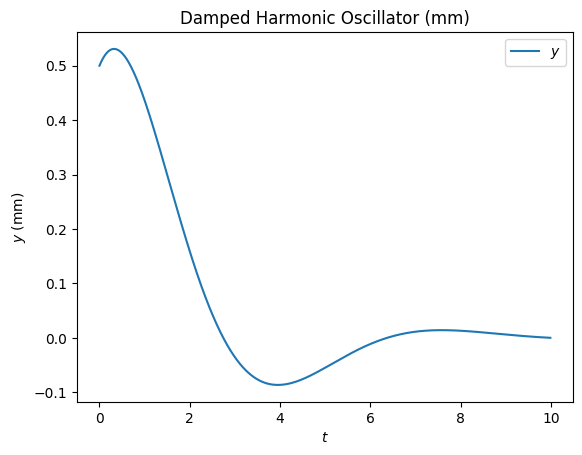

In [33]:
# Plot 0
plt.figure(0)
plt.plot(t, y)
plt.title('Damped Harmonic Oscillator (mm)', loc='center')
plt.xlabel('$t$')
plt.ylabel('$y$ (mm)')
plt.legend(['$y$'])
plt.show()

Plotting the phase plot of $y$ and $y^\prime$.

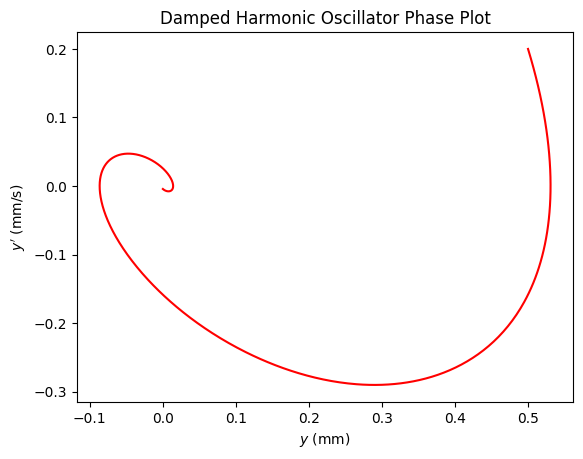

In [34]:
# Plot 1
plt.figure(1)
plt.plot(y, yprime, color='red')
plt.title('Damped Harmonic Oscillator Phase Plot', loc='center')
plt.xlabel('$y$ (mm)')
plt.ylabel('$y^\prime$ (mm/s)')
plt.show()

### Eigen Values of the ODE

Consider the equation:

$$\frac{d^2y}{dt^2} + a\frac{dy}{dt} + by = 0$$

where $a$ and $b$ are constants.

$$\therefore \lambda^2 + a\lambda + b = 0$$

is the characteristic polynomial and $\lambda$ is an **Eigen Value**.

In [30]:
model_ = ode.second_order_ode(a_c, b_c, 0, y0, [0, 10])

eigen_vals = model_.eigen_values()

print(f'The eigen values for the homogenous equation: {eigen_vals}')

The eigen values for the homogenous equation: ((-0.5+0.8660254037844386j), (-0.5-0.8660254037844386j))


### Equilibrium

In [31]:
equilib = model_.equilibrium()

print(f'Equilibrium point is {equilib}')

Equilibrium point is [0. 0.]


As seen from the above plots, the `Harmonic Oscillator` loses amplitude as time goes on. This is due to the damping term (First Order term) in the differential equation. The Eigen Values of this model have a negative real part, which implies the equilibrium point $(0, 0)$ is a `Stable Focus`. This is clearly seen in the phase plot as time goes on, the solution tends towards the equilibrium point.